# KNN Classification

## Import Dataset

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = data.data
Y = data.target

## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
# print(train_test_split.__doc__)
Xtrn, Xtst, Ytrn, Ytst = train_test_split(X,Y, train_size = 0.8, random_state = 10)

In [5]:
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Selecting Value of k

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
error = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(Xtrn, Ytrn)  #fit the model
    pred=model.predict(Xtst) #make prediction on test set
    error.append(np.mean(pred != Ytst))#calculate error and append
    print('Error value for k= ' , K , 'is:', np.min(error))

Error value for k=  1 is: 0.03333333333333333
Error value for k=  2 is: 0.03333333333333333
Error value for k=  3 is: 0.03333333333333333
Error value for k=  4 is: 0.03333333333333333
Error value for k=  5 is: 0.03333333333333333
Error value for k=  6 is: 0.03333333333333333
Error value for k=  7 is: 0.03333333333333333
Error value for k=  8 is: 0.0
Error value for k=  9 is: 0.0
Error value for k=  10 is: 0.0
Error value for k=  11 is: 0.0
Error value for k=  12 is: 0.0
Error value for k=  13 is: 0.0
Error value for k=  14 is: 0.0
Error value for k=  15 is: 0.0
Error value for k=  16 is: 0.0
Error value for k=  17 is: 0.0
Error value for k=  18 is: 0.0
Error value for k=  19 is: 0.0
Error value for k=  20 is: 0.0


<AxesSubplot:>

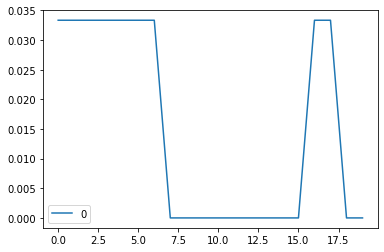

In [7]:
#plotting the rmse values against k values
import pandas as pd
curve = pd.DataFrame(error) #elbow curve 
curve.plot()

## Training KNN Classifier

In [8]:
# from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors = 8)

In [10]:
model.fit(Xtrn,Ytrn)

KNeighborsClassifier(n_neighbors=8)

## Evaluation of model

In [11]:
Ypred = model.predict(Xtst)

In [12]:
print(Ytst)
print(Ypred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


### 1.Accuracy

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytst,Ypred)
acc

1.0

### 2.Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
# print(confusion_matrix.__doc__)
# columns represent Predicted class, Rows represent Actual Class
cm = confusion_matrix(Ytst,Ypred,labels=[0,1,2])
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

### 3.Recall Matrix

In [15]:
# #Predicted/ #Actual class
rm =(((cm.T)/(cm.sum(axis=1))).T) #Recall
rm

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
from sklearn import metrics
rec = metrics.recall_score(Ytst,Ypred,average = 'macro')
print(rec)

1.0


### 4.Precision Matrix

In [17]:
# #Actual Class/ #Prediction
pm =(cm/cm.sum(axis=0)) #Precision 
pm

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
prec = metrics.precision_score(Ytst,Ypred, average = 'macro')
print(prec)

1.0


### 5.F1 Score

In [19]:
F1 = 2*pm*rm/(pm+rm)
F1

<ipython-input-19-b6ad37cba0ad>:1: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2*pm*rm/(pm+rm)


array([[ 1., nan, nan],
       [nan,  1., nan],
       [nan, nan,  1.]])

In [20]:
f1 = metrics.f1_score(Ytst,Ypred, average = 'micro')
print(f1)

1.0


# .
.
.
.
.




# KNN Regression

## Import Datasets

In [21]:
from sklearn.datasets import load_boston
data = load_boston()

In [22]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
# print(data.DESCR)
X = data.data
Y = data.target

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
# print(train_test_split.__doc__)
Xtrn, Xtst, Ytrn, Ytst = train_test_split(X,Y, train_size = 0.9, random_state = 10)

In [25]:
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)

(455, 13)
(455,)
(51, 13)
(51,)


## Select the value of k

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrn, Ytrn)  #fit the model
    pred=model.predict(Xtst) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(Ytst,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.831096885582028
RMSE value for k=  2 is: 8.212523315990419
RMSE value for k=  3 is: 6.889823887634167
RMSE value for k=  4 is: 6.748836137860088
RMSE value for k=  5 is: 6.555881658001881
RMSE value for k=  6 is: 6.678795747450702
RMSE value for k=  7 is: 6.7819916074900615
RMSE value for k=  8 is: 6.969207483005255
RMSE value for k=  9 is: 7.12419513900348
RMSE value for k=  10 is: 7.141672649687474
RMSE value for k=  11 is: 7.146324440297669
RMSE value for k=  12 is: 7.233379830277348
RMSE value for k=  13 is: 7.446423791898266
RMSE value for k=  14 is: 7.5706126350691125
RMSE value for k=  15 is: 7.789130575348297
RMSE value for k=  16 is: 7.948984714812548
RMSE value for k=  17 is: 8.063445201496597
RMSE value for k=  18 is: 8.12025907714951
RMSE value for k=  19 is: 8.117561200749705
RMSE value for k=  20 is: 8.236210222154932
RMSE value for k=  21 is: 8.257759624461341
RMSE value for k=  22 is: 8.354768340708198
RMSE value for k=  23 is: 8.3327242670043

<AxesSubplot:>

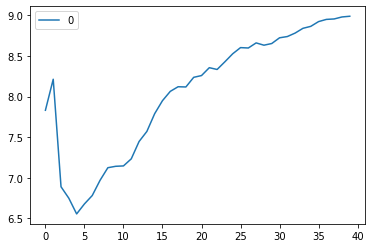

In [27]:
#plotting the rmse values against k values
# import pandas as pd
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Training KNN Regressor

In [28]:
# from sklearn.neighbors import KNeighborsRegressor

In [29]:
model = KNeighborsRegressor(n_neighbors = 5 )
model.fit(Xtrn,Ytrn)

KNeighborsRegressor()

## Evaluation of model

In [30]:
Ypred = model.predict(Xtst)

In [31]:
print(Ytst)
print(Ypred)

[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7]
[31.46 33.62 26.76 25.74 21.6  13.34 38.96 17.44 28.38 33.64 21.16 28.66
 35.72 27.46 28.94 39.32 24.56 32.24 23.32 21.5  27.64 17.82 20.14 21.66
 32.84 25.98 17.94 14.46 29.82 10.66 23.56 38.6  27.46 23.28 14.76 20.34
 12.12 34.42 22.3  25.14 24.78 20.94 16.54 33.   21.72 29.4  24.66 16.72
 30.84 17.42 28.72]


## Mean Absolute Error

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(Ypred,Ytst)

4.8921568627450975

## Mean Squared Error

In [34]:
# from sklearn.metrics import mean_squared_error

In [35]:
metrics.mean_squared_error(Ypred,Ytst)

42.97958431372549

## Root Mean Squared Error

In [36]:
metrics.mean_squared_error(Ypred,Ytst)**.5

6.555881658001881

## Score

In [37]:
scr = model.score(Xtst,Ytst)
print(scr)

0.5658766767101384


## R2 Score

In [38]:
r2 = metrics.r2_score(Ytst, Ypred)
print(r2)

0.5658766767101384
